**Getting to know hdf5 datset**

In [ ]:
import h5py
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
import numpy as np
import h5py

In [ ]:
with h5py.File('/content/drive/MyDrive/hdf5_dataset/quark-gluon_data-set_n139306.hdf5','r') as hdf:
  ls = list(hdf.keys())
  print('List of datasets in this file: \n',ls)
  data = hdf.get('dataset1')
  dataset1 = np.array(data)
  print('Shape of dataset1: \n', dataset1.shape)

List of datasets in this file: 
 ['X_jets', 'm0', 'pt', 'y']
Shape of dataset1: 
 ()


In [ ]:
dataset1

array(None, dtype=object)

In [ ]:


import numpy as np
import h5py


arr1 = np.random.randn(10000)
arr2 = np.random.randn(10000)

with h5py.File('/content/drive/MyDrive/hdf5_dataset/quark-gluon_data-set_n139306.hdf5', 'w') as f:
    f.create_dataset('array_1', data = arr1)
    f.create_dataset('array_2', data = arr2)

In [ ]:
import h5py

In [ ]:
data_path= '/content/drive/MyDrive/hdf5_dataset/quark-gluon_data-set_n139306.hdf5'
with h5py.File(data_path, 'r') as f:
    # Access the file object
    file_object = f

    # Get dataset names
    dataset_names = list(file_object.keys())
    print("Datasets:", dataset_names)

Datasets: ['X_jets', 'm0', 'pt', 'y']


'X_jets'

139306


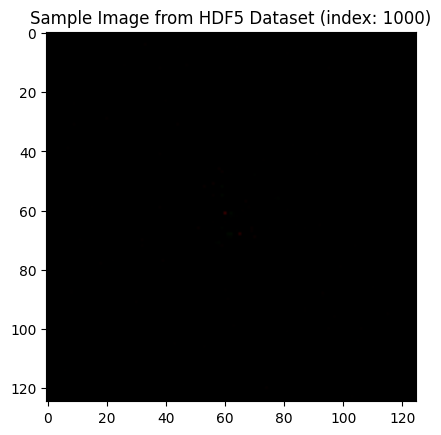

139306


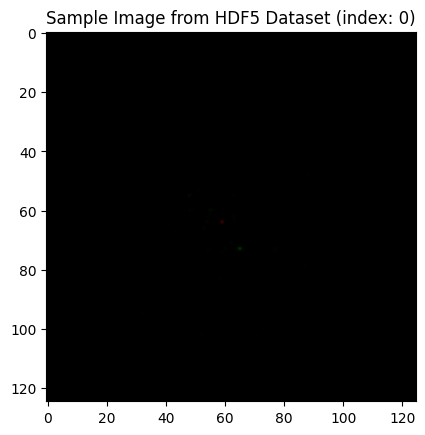

139306


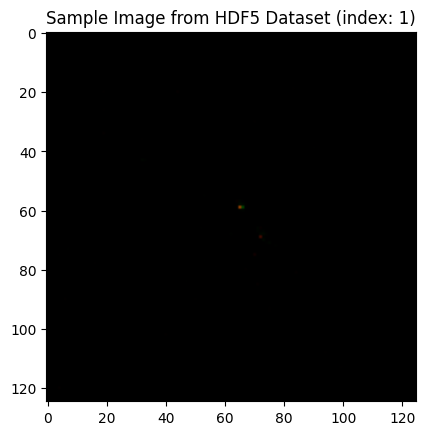

139306


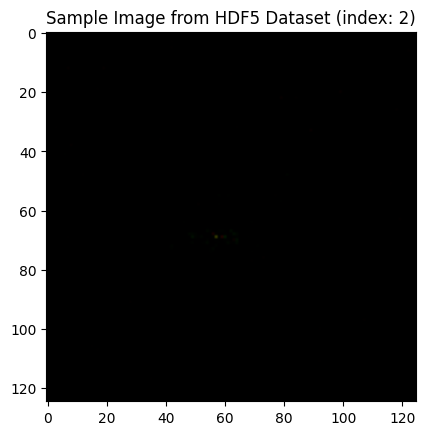

139306


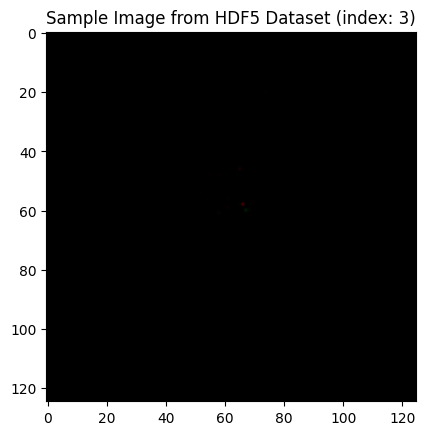

139306


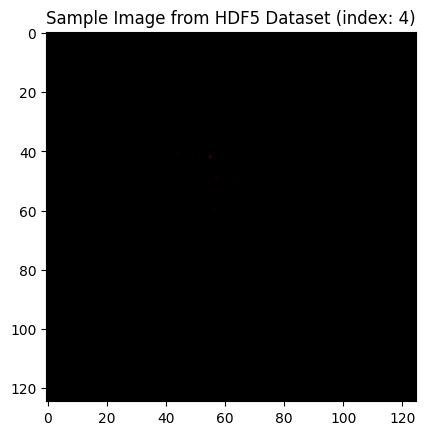

In [ ]:
import h5py
import matplotlib.pyplot as plt

# Function to visualize a single image from the HDF5 dataset
def visualize_hdf5_image(data_path, index):
  """
  Visualizes a single image from the specified HDF5 dataset at a given index.

  Args:
      data_path: Path to the HDF5 file.
      index: Index of the image to visualize.
  """
  try:
    with h5py.File(data_path, 'r') as f:
      # Assuming the data is in a dataset named 'X_jets'
      data = f['X_jets']

      print(len(data))


      # Check if the index is within bounds
      if index >= 0 and index < data.shape[0]:
        image = data[index]  # Select the image at the given index
        plt.imshow(image[..., :3])  # Extract and visualize the first 3 channels
        plt.title(f'Sample Image from HDF5 Dataset (index: {index})')
        plt.show()
      else:
        print(f"Error: Index {index} is out of bounds.")
  except Exception as e:
    print(f"Error visualizing HDF5 image: {e}")

data_path= '/content/drive/MyDrive/hdf5_dataset/quark-gluon_data-set_n139306.hdf5'# Specify the HDF5 file path
  # Replace with your actual path

# Visualize a sample image (start with index 0)
visualize_hdf5_image(data_path, 1000)

# Optionally, visualize multiple images using a loop
for i in range(5):  # Visualize the first 5 images
  visualize_hdf5_image(data_path, i)


In [ ]:
with h5py.File(data_path, 'r') as f:
      # Assuming the data is in a dataset named 'X_jets'
      data = f['X_jets']

      print(data)


<HDF5 dataset "X_jets": shape (139306, 125, 125, 3), type "<f4">


In [ ]:
with h5py.File(data_path, 'r') as f:
      # Assuming the data is in a dataset named 'X_jets'
      data = f['X_jets']

In [ ]:
import h5py
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from scipy import ndimage

# Function to load a subset of the dataset (to avoid memory overload)
def load_data_subset(data_path, start_index, end_index):
    """
    Loads a subset of the data from the HDF5 file.

    Args:
        data_path: Path to the HDF5 file.
        start_index: Starting index of the subset.
        end_index: Ending index (exclusive) of the subset.

    Returns:
        A NumPy array containing the loaded subset of the data.
    """
    try:
        with h5py.File(data_path, 'r') as f:
            data = f['X_jets']
            return data[start_index:end_index]
    except Exception as e:
        print(f"Error loading data subset: {e}")
        return None

# Specify data path and subset size (adjust as needed)
data_path = '/content/drive/MyDrive/hdf5_dataset/quark-gluon_data-set_n139306.hdf5'
subset_size = 10000  # Adjust this value to manage memory usage

# Load a data subset (example: starting from index 0)
data = load_data_subset(data_path, 0, subset_size)

In [ ]:
data

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [ ]:
layers.Input(shape=(125, 125, 3))

<KerasTensor: shape=(None, 125, 125, 3) dtype=float32 (created by layer 'input_3')>

**Common Task 1. Auto-encoder of the quark/gluon events**

(1000, 125, 125, 3)
Data shape mismatch, resizing...
Epoch 1/10
29/29 [==============================] - 67s 2s/step - loss: 0.1195 - val_loss: 1.4762e-05
Epoch 2/10
29/29 [==============================] - 68s 2s/step - loss: 4.1214e-06 - val_loss: 1.9907e-06
Epoch 3/10
29/29 [==============================] - 64s 2s/step - loss: 2.1761e-06 - val_loss: 1.9207e-06
Epoch 4/10
29/29 [==============================] - 65s 2s/step - loss: 2.1510e-06 - val_loss: 1.9143e-06
Epoch 5/10
29/29 [==============================] - 74s 3s/step - loss: 2.1465e-06 - val_loss: 1.9105e-06
Epoch 6/10
29/29 [==============================] - 64s 2s/step - loss: 2.1427e-06 - val_loss: 1.9067e-06
Epoch 7/10
29/29 [==============================] - 65s 2s/step - loss: 2.1387e-06 - val_loss: 1.9026e-06
Epoch 8/10
29/29 [==============================] - 65s 2s/step - loss: 2.1345e-06 - val_loss: 1.8983e-06
Epoch 9/10
29/29 [==============================] - 65s 2s/step - loss: 2.1301e-06 - val_loss: 1.8938e-

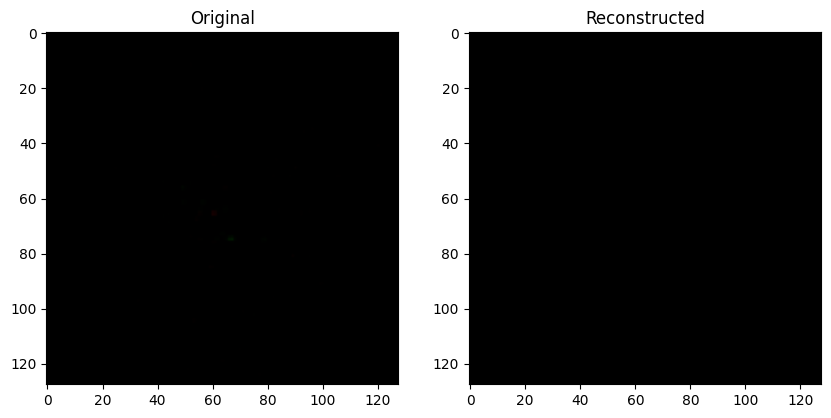

1/1 [==============================] - 0s 45ms/step


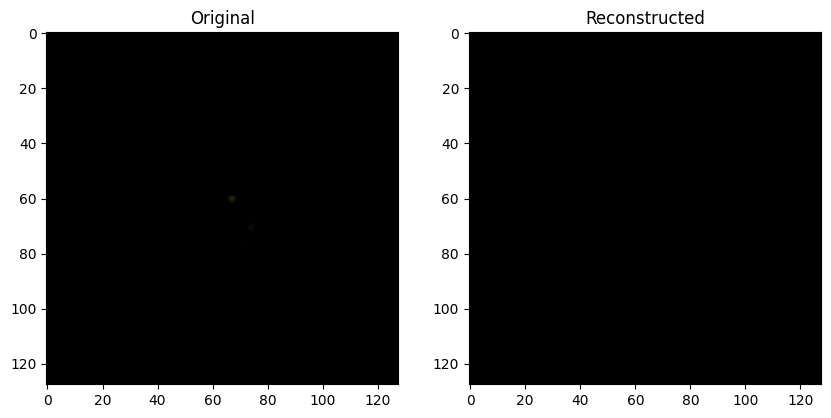

1/1 [==============================] - 0s 36ms/step


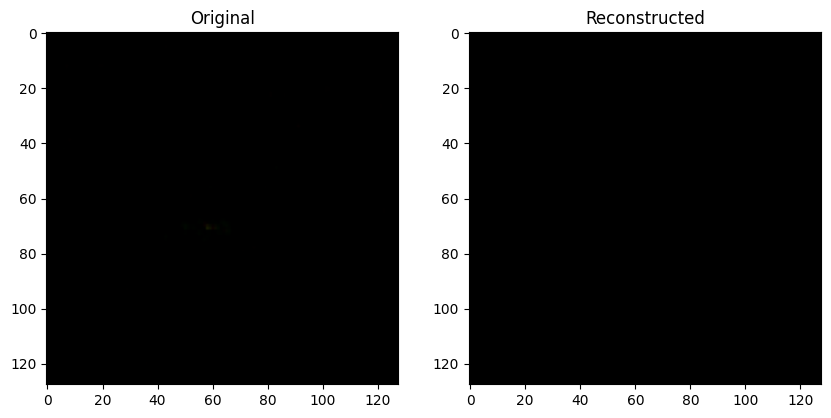

1/1 [==============================] - 0s 36ms/step


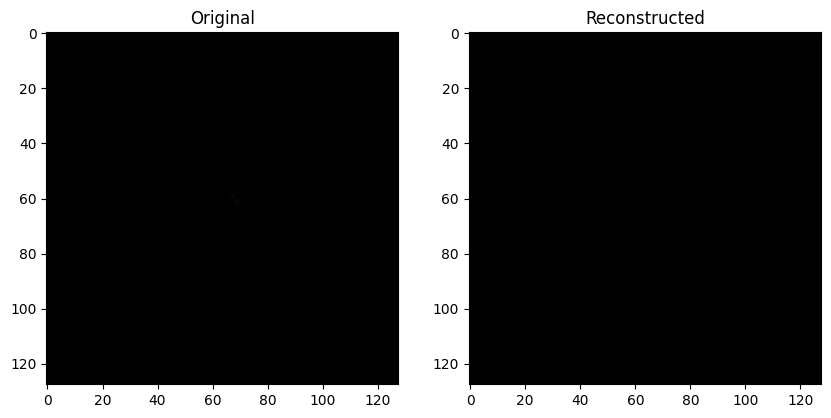

1/1 [==============================] - 0s 38ms/step


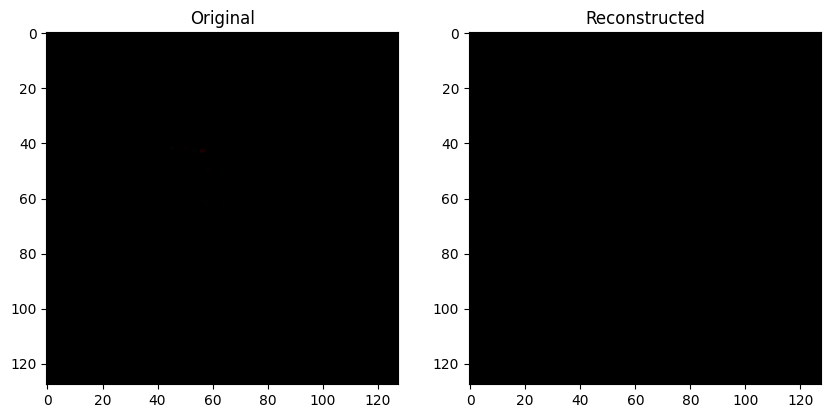

In [ ]:
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Function to load a subset of the dataset (to avoid memory overload)
def load_data_subset(data_path, start_index, end_index):
    """
    Loads a subset of the data from the HDF5 file.

    Args:
        data_path: Path to the HDF5 file.
        start_index: Starting index of the subset.
        end_index: Ending index (exclusive) of the subset.

    Returns:
        A NumPy array containing the loaded subset of the data.
    """
    try:
        with h5py.File(data_path, 'r') as f:
            data = f['X_jets']
            return data[start_index:end_index]
    except Exception as e:
        print(f"Error loading data subset: {e}")
        return None

# Specify data path and subset size (adjust as needed)
data_path = '/content/drive/MyDrive/hdf5_dataset/quark-gluon_data-set_n139306.hdf5'
subset_size = 1000  # Adjust this value to manage memory usage

# Load a data subset (example: starting from index 0)
data = load_data_subset(data_path, 0, subset_size)
print(data.shape)

if data is not None:
    # Ensure data has the expected shape (128, 128, 3)
    if data.shape[1:] != (128, 128, 3):
        print("Data shape mismatch, resizing...")
        data = tf.image.resize(data, (128, 128))

    # Define the autoencoder architecture
    def create_autoencoder():
        input_img = layers.Input(shape=(128, 128, 3))

        # Encoder
        x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)
        x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)
        encoded = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)

        # Decoder
        x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(encoded)
        x = layers.UpSampling2D((2, 2))(x)
        x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
        x = layers.UpSampling2D((2, 2))(x)
        decoded = layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)

        autoencoder = tf.keras.Model(input_img, decoded)
        return autoencoder

    # Train the autoencoder with mean_squared_error loss
    autoencoder = create_autoencoder()
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    autoencoder.fit(data, data, epochs=10, batch_size=32, validation_split=0.1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

    # Visualize original and reconstructed images (using the loaded subset)
    for i in range(5):
        original = data[i]
        reconstructed = autoencoder.predict(data[i:i+1])[0]

        plt.figure(figsize=(10, 5))

        plt.subplot(121)
        plt.imshow(original)
        plt.title('Original')

        plt.subplot(122)
        plt.imshow(reconstructed)
        plt.title('Reconstructed')

        plt.show()
else:
    print("Error loading data. Please adjust subset size or data loading strategy.")


**Specific Task 3:Learning the Latent Structure with Diffusion Models**

In [ ]:
import numpy as np

from tqdm.auto import trange, tqdm
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
import h5py
import numpy as np

def load_data_subset(data_path, start_index, end_index):
    """
    Loads a subset of the data from the HDF5 file.

    Args:
        data_path: Path to the HDF5 file.
        start_index: Starting index of the subset.
        end_index: Ending index (exclusive) of the subset.

    Returns:
        A NumPy array containing the loaded subset of the data.
    """
    try:
        with h5py.File(data_path, 'r') as f:
            data = f['X_jets']
            return data[start_index:end_index]
    except Exception as e:
        print(f"Error loading data subset: {e}")
        return None

# Specify data path and subset size (adjust as needed)
data_path = '/content/drive/MyDrive/hdf5_dataset/quark-gluon_data-set_n139306.hdf5'
subset_size = 1000  # Adjust this value to manage memory usage

# Load a data subset (example: starting from index 0)
data = load_data_subset(data_path, 0, subset_size)
print(data.shape)


# Filter training data (optional)
# class_label = 1
# X_train = X_train[y_train.squeeze() == class_label]



# Now you have your loaded, filtered, and normalized training data (X_train)
# and test data (X_test) if it exists


(1000, 125, 125, 3)


**Diffusion implementation from scratch**

In [ ]:
import h5py
import numpy as np

# Replace with your HDF5 file path
data_path = '/content/drive/MyDrive/hdf5_dataset/quark-gluon_data-set_n139306.hdf5'

with h5py.File(data_path, 'r') as f:
    # Load the first 200 X_jets images
    X_train = f['X_jets'][:200]

    # Load the corresponding first 200 labels
    y_train = f['y'][:200]

# Normalize X_train
X_train = (X_train / 127.5) - 1.0

# Define other variables (unchanged)
IMG_SIZE = 32  # input image size
BATCH_SIZE = 128  # for training batch size
timesteps = 16  # how many steps for a noisy image into clear
time_bar = 1 - np.linspace(0, 1.0, timesteps + 1)  # linspace for timesteps

In [ ]:
IMG_SIZE = 125     # input image size, CIFAR-10 is 32x32
BATCH_SIZE = 128  # for training batch size
timesteps = 16    # how many steps for a noisy image into clear
time_bar = 1 - np.linspace(0, 1.0, timesteps + 1)

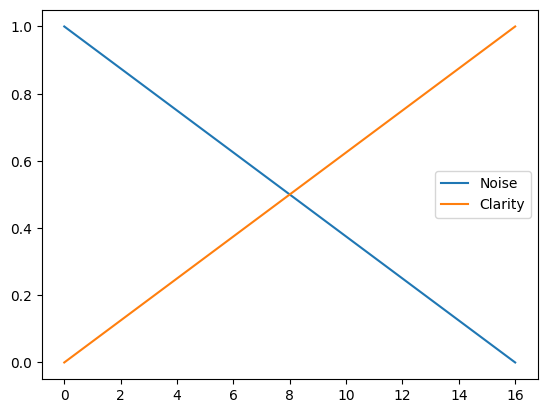

In [ ]:
plt.plot(time_bar, label='Noise')
plt.plot(1 - time_bar, label='Clarity')
plt.legend()

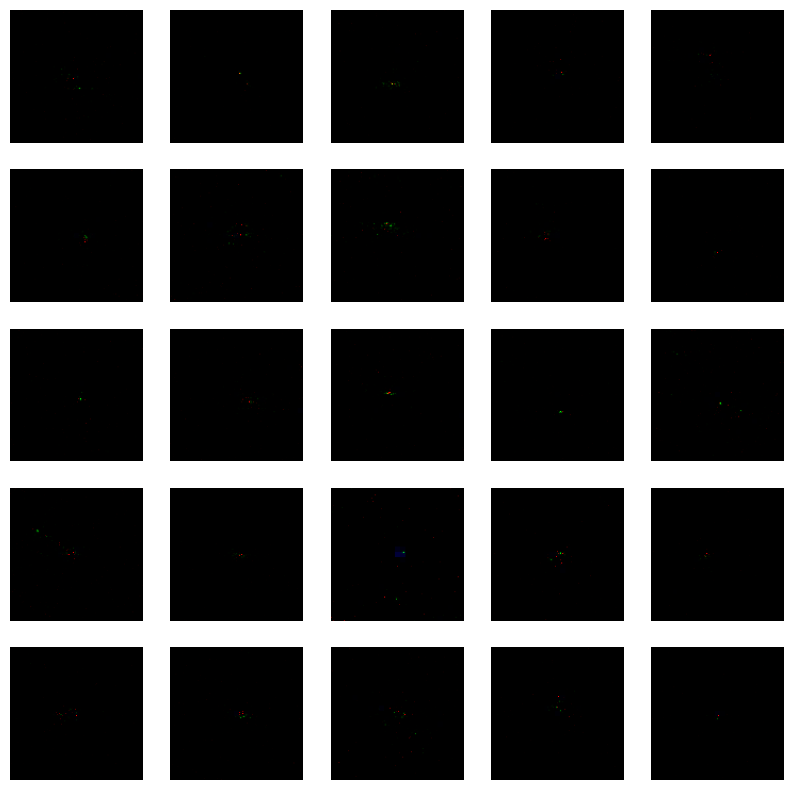

In [ ]:
def cvtImg(img):
    img = img - img.min()
    img = (img / img.max())
    return img.astype(np.float32)

def show_examples(x):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        img = cvtImg(x[i])
        plt.imshow(img)
        plt.axis('off')

show_examples(X_train)

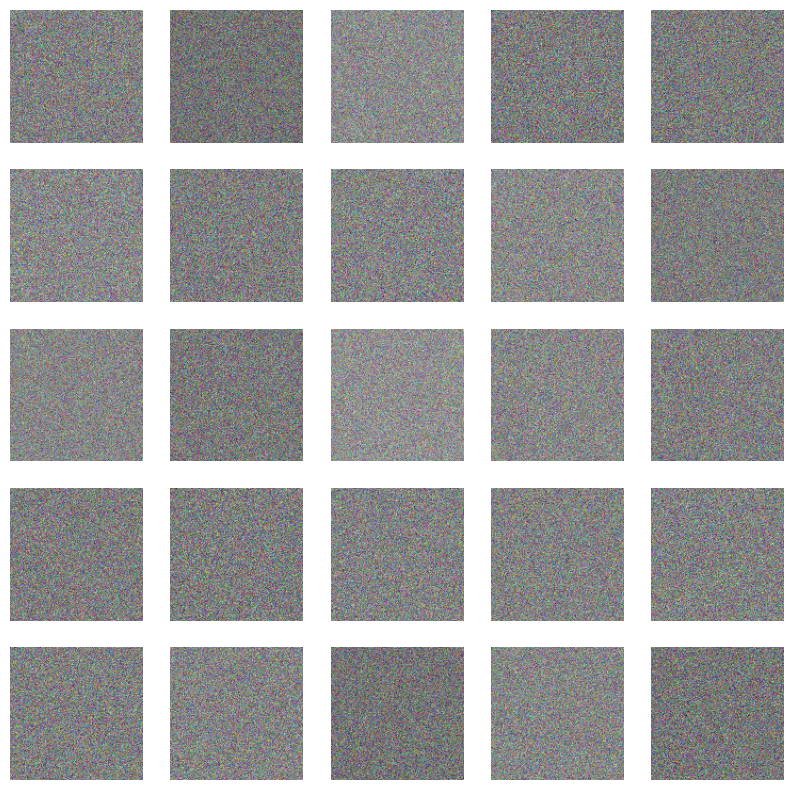

In [ ]:
def forward_noise(x, t):
    a = time_bar[t]      # base on t
    b = time_bar[t + 1]  # image for t + 1

    noise = np.random.normal(size=x.shape)  # noise mask
    a = a.reshape((-1, 1, 1, 1))
    b = b.reshape((-1, 1, 1, 1))
    img_a = x * (1 - a) + noise * a
    img_b = x * (1 - b) + noise * b
    return img_a, img_b

def generate_ts(num):
    return np.random.randint(0, timesteps, size=num)

# t = np.full((25,), timesteps - 1) # if you want see clarity
# t = np.full((25,), 0)             # if you want see noisy
t = generate_ts(25)             # random for training data
a, b = forward_noise(X_train[:25], t)
show_examples(a)

In [ ]:
def block(x_img, x_ts):
    x_parameter = layers.Conv2D(128, kernel_size=3, padding='same')(x_img)
    x_parameter = layers.Activation('relu')(x_parameter)

    time_parameter = layers.Dense(128)(x_ts)
    time_parameter = layers.Activation('relu')(time_parameter)
    time_parameter = layers.Reshape((1, 1, 128))(time_parameter)
    x_parameter = x_parameter * time_parameter

    # -----
    x_out = layers.Conv2D(128, kernel_size=3, padding='same')(x_img)
    x_out = x_out + x_parameter
    x_out = layers.LayerNormalization()(x_out)
    x_out = layers.Activation('relu')(x_out)

    return x_out

In [ ]:
def make_model():
    x = x_input = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name='x_input')

    x_ts = x_ts_input = layers.Input(shape=(1,), name='x_ts_input')
    x_ts = layers.Dense(192)(x_ts)
    x_ts = layers.LayerNormalization()(x_ts)
    x_ts = layers.Activation('relu')(x_ts)

    # ----- left ( down ) -----
    x = x32 = block(x, x_ts)
    x = layers.MaxPool2D(2)(x)

    x = x16 = block(x, x_ts)
    x = layers.MaxPool2D(2)(x)

    x = x8 = block(x, x_ts)
    x = layers.MaxPool2D(2)(x)

    x = x4 = block(x, x_ts)

    # ----- MLP -----
    x = layers.Flatten()(x)
    x = layers.Concatenate()([x, x_ts])
    x = layers.Dense(128)(x)
    x = layers.LayerNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Dense(4 * 4 * 32)(x)
    x = layers.LayerNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Reshape((4, 4, 32))(x)

    # ----- right ( up ) -----
    x = layers.Concatenate()([x, x4])
    x = block(x, x_ts)
    x = layers.UpSampling2D(2)(x)

    x = layers.Concatenate()([x, x8])
    x = block(x, x_ts)
    x = layers.UpSampling2D(2)(x)

    x = layers.Concatenate()([x, x16])
    x = block(x, x_ts)
    x = layers.UpSampling2D(2)(x)

    x = layers.Concatenate()([x, x32])
    x = block(x, x_ts)

    # ----- output -----
    x = layers.Conv2D(3, kernel_size=1, padding='same')(x)
    model = tf.keras.models.Model([x_input, x_ts_input], x)
    return model

model = make_model()
# model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0008)
loss_func = tf.keras.losses.MeanAbsoluteError()
model.compile(loss=loss_func, optimizer=optimizer)

  0%|          | 0/16 [00:00<?, ?it/s]

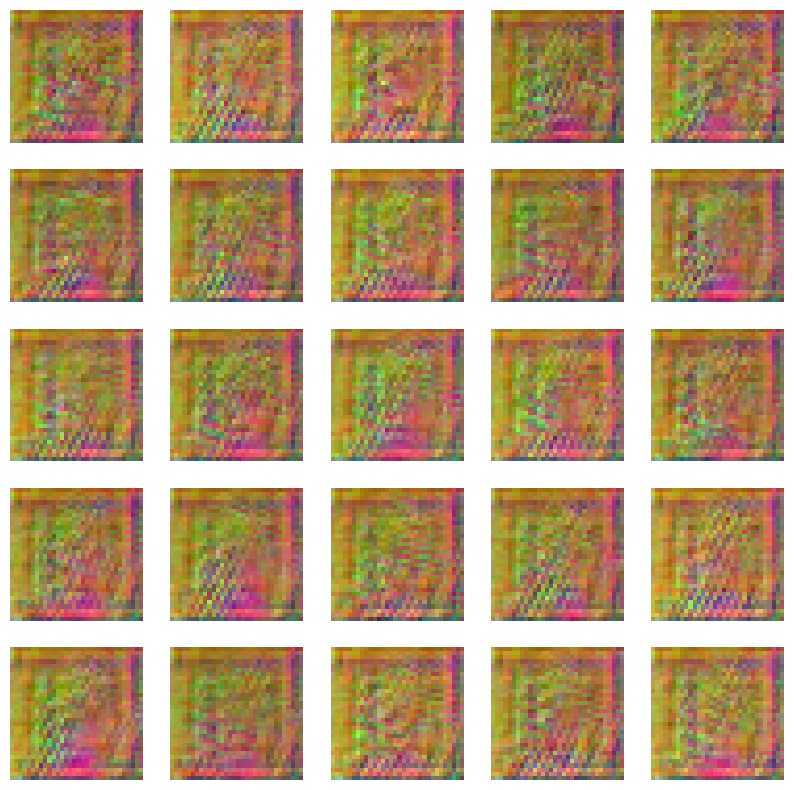

In [ ]:
def predict(x_idx=None):
    x = np.random.normal(size=(32, IMG_SIZE, IMG_SIZE, 3))
    for i in trange(timesteps):
        t = i
        x = model.predict([x, np.full((32), t)], verbose=0)
    show_examples(x)

predict()

  0%|          | 0/16 [00:00<?, ?it/s]

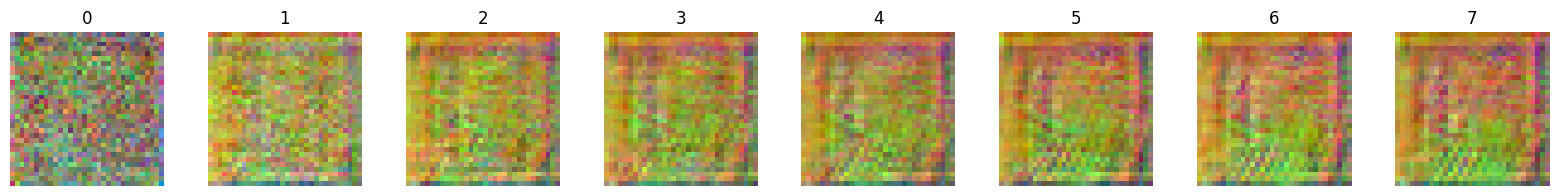

In [ ]:
def predict_step():
    xs = []
    x = np.random.normal(size=(8, IMG_SIZE, IMG_SIZE, 3))

    for i in trange(timesteps):
        t = i
        x = model.predict([x, np.full((8),  t)], verbose=0)
        if i % 2 == 0:
            xs.append(x[0])

    plt.figure(figsize=(20, 2))
    for i in range(len(xs)):
        plt.subplot(1, len(xs), i+1)
        plt.imshow(cvtImg(xs[i]))
        plt.title(f'{i}')
        plt.axis('off')

predict_step()

In [ ]:
def train_one(x_img):
    x_ts = generate_ts(len(x_img))
    x_a, x_b = forward_noise(x_img, x_ts)
    loss = model.train_on_batch([x_a, x_ts], x_b)
    return loss

In [ ]:
def train(R=50):
    bar = trange(R)
    total = 100
    for i in bar:
        for j in range(total):
            x_img = X_train[np.random.randint(len(X_train), size=BATCH_SIZE)]
            loss = train_one(x_img)
            pg = (j / total) * 100
            if j % 5 == 0:
                bar.set_description(f'loss: {loss:.5f}, p: {pg:.2f}%')

In [ ]:
for _ in range(10):
    train()
    # reduce learning rate for next training
    model.optimizer.learning_rate = max(0.000001, model.optimizer.learning_rate * 0.9)

    # show result
    predict()
    predict_step()
    plt.show()

In [ ]:
data.shape

(1000, 125, 125, 3)